# Exploring one Dataset

In [1]:
import scipy.io
import numpy as np
import os

In [2]:
mat_path = '/Users/tarunshyam/Learning/NASA_Battery_data/Randomized Battery Usage/DataSet/1) Raw/Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post/data/Matlab/RW9.mat'
data = scipy.io.loadmat(mat_path)

In [3]:
#Inspecting Top-Level Keys
print("Top-level keys:")
for key in data:
    if not key.startswith('__'):
        print("-", key)

Top-level keys:
- data


In [4]:
print("Available keys in .mat file:")
for key in data:
    if not key.startswith('__'):
        print("-", key)

Available keys in .mat file:
- data


In [5]:
# unwrapping Battery Data and Fields
battery_data = data['data'][0, 0]
fields = battery_data.dtype.names

print("Fields in RW9:")
for field in fields:
    print("-", field)

Fields in RW9:
- step
- procedure
- description


In [6]:
# Exploring Steps
steps = battery_data['step'][0]

print(f"Total steps: {len(steps)}\n")

print("Available fields in one step:")
print(steps[0].dtype.names)

Total steps: 113578

Available fields in one step:
('comment', 'type', 'time', 'relativeTime', 'voltage', 'current', 'temperature', 'date')


In [7]:
print(steps)

[(array(['reference charge'], dtype='<U16'), array(['C'], dtype='<U1'), array([[5.040000e+00, 1.504000e+01, 2.504000e+01, ..., 1.049504e+04,
         1.050504e+04, 1.050966e+04]]), array([[4.000000e-02, 1.004000e+01, 2.004000e+01, ..., 1.049004e+04,
         1.050004e+04, 1.050466e+04]]), array([[3.838, 3.865, 3.878, ..., 4.2  , 4.2  , 4.2  ]]), array([[-2.007, -2.   , -2.   , ..., -0.013, -0.013, -0.01 ]]), array([[24.3853 , 24.3853 , 24.29163, ..., 22.12163, 22.16847, 22.10602]]), array(['06-Jan-2014 13:36:43'], dtype='<U20'))
 (array(['reference discharge'], dtype='<U19'), array(['D'], dtype='<U1'), array([[10509.7 , 10519.7 , 10529.7 , 10539.7 , 10549.7 , 10559.7 ,
         10569.7 , 10579.7 , 10589.7 , 10599.7 , 10609.7 , 10619.7 ,
         10629.7 , 10639.7 , 10649.7 , 10659.7 , 10669.7 , 10679.7 ,
         10689.7 , 10699.7 , 10709.7 , 10719.7 , 10729.7 , 10739.7 ,
         10749.7 , 10759.7 , 10769.7 , 10779.7 , 10789.7 , 10799.7 ,
         10809.7 , 10819.7 , 10829.7 , 10839.7

In [8]:
print(steps['voltage'])

[array([[3.838, 3.865, 3.878, ..., 4.2  , 4.2  , 4.2  ]])
 array([[4.113, 4.099, 4.091, 4.085, 4.079, 4.075, 4.071, 4.067, 4.063,
         4.06 , 4.058, 4.055, 4.053, 4.05 , 4.048, 4.046, 4.044, 4.043,
         4.041, 4.039, 4.038, 4.036, 4.034, 4.033, 4.031, 4.03 , 4.028,
         4.027, 4.025, 4.024, 4.023, 4.021, 4.02 , 4.018, 4.017, 4.015,
         4.014, 4.013, 4.011, 4.01 , 4.009, 4.007, 4.006, 4.005, 4.003,
         4.002, 4.001, 3.999, 3.998, 3.997, 3.996, 3.994, 3.993, 3.992,
         3.99 , 3.989, 3.988, 3.987, 3.985, 3.984, 3.983, 3.982, 3.98 ,
         3.979, 3.978, 3.977, 3.975, 3.974, 3.973, 3.971, 3.97 , 3.969,
         3.968, 3.966, 3.965, 3.964, 3.963, 3.961, 3.96 , 3.959, 3.958,
         3.957, 3.956, 3.954, 3.953, 3.952, 3.951, 3.949, 3.948, 3.947,
         3.946, 3.945, 3.943, 3.942, 3.941, 3.94 , 3.939, 3.937, 3.936,
         3.935, 3.934, 3.933, 3.932, 3.931, 3.929, 3.928, 3.927, 3.926,
         3.925, 3.924, 3.922, 3.921, 3.92 , 3.919, 3.918, 3.917, 3.915,
      

In [9]:
print(steps['voltage'].shape)

(113578,)


In [10]:
print("=== PROCEDURE ===")
print(battery_data['procedure'])

print("\n=== DESCRIPTION ===")
print(battery_data['description'])

=== PROCEDURE ===
['Uniform random walk charge and discharge at room temperature']

=== DESCRIPTION ===
['Experiment consisting of repeated iteration of a randomized series of charging and discharging pulses followed by a full recharge to 4.2V. Batteries are charged and discharged at room temperature']


# Data Flattening - Converting .mat file into CSV

In [11]:
import pandas as pd

In [12]:
# parsing into list of dicts
records = []
for i, step in enumerate(steps):
    try:
        step_type = step['type'][0]
        if isinstance(step_type, bytes):
            step_type = step_type.decode('utf-8')

        records.append({
            'step_id': i,
            'type': step_type,
            'relative_time': step['relativeTime'][0][0],
            'voltage': step['voltage'][0][0],
            'current': step['current'][0][0],
            'temperature': step['temperature'][0][0]
        })
    except Exception as e:
        print(f"Step {i} failed: {e}")

In [13]:
# Creating DataFrame
df_steps = pd.DataFrame(records)

# EDA - Explorative Data Analysis

In [14]:
print(df_steps)

        step_id type  relative_time  voltage current  temperature
0             0    C           0.04    3.838  -2.007     24.38530
1             1    D           0.04    4.113   1.004     22.10602
2             2    C           0.03    3.492   -2.01     27.49199
3             3    D           0.04    4.113   1.003     22.55875
4             4    R           0.01    4.199       0     22.99587
...         ...  ...            ...      ...     ...          ...
113573   113573    R           0.01    3.328       0     38.29132
113574   113574    C           0.04    4.096    -2.0     32.10779
113575   113575    R           0.01    4.198       0     32.40151
113576   113576    D           0.04    4.055   1.005     32.46334
113577   113577    R           0.01    3.327       0     38.86329

[113578 rows x 6 columns]


In [15]:
steps

array([(array(['reference charge'], dtype='<U16'), array(['C'], dtype='<U1'), array([[5.040000e+00, 1.504000e+01, 2.504000e+01, ..., 1.049504e+04,
               1.050504e+04, 1.050966e+04]]), array([[4.000000e-02, 1.004000e+01, 2.004000e+01, ..., 1.049004e+04,
               1.050004e+04, 1.050466e+04]]), array([[3.838, 3.865, 3.878, ..., 4.2  , 4.2  , 4.2  ]]), array([[-2.007, -2.   , -2.   , ..., -0.013, -0.013, -0.01 ]]), array([[24.3853 , 24.3853 , 24.29163, ..., 22.12163, 22.16847, 22.10602]]), array(['06-Jan-2014 13:36:43'], dtype='<U20')),
       (array(['reference discharge'], dtype='<U19'), array(['D'], dtype='<U1'), array([[10509.7 , 10519.7 , 10529.7 , 10539.7 , 10549.7 , 10559.7 ,
               10569.7 , 10579.7 , 10589.7 , 10599.7 , 10609.7 , 10619.7 ,
               10629.7 , 10639.7 , 10649.7 , 10659.7 , 10669.7 , 10679.7 ,
               10689.7 , 10699.7 , 10709.7 , 10719.7 , 10729.7 , 10739.7 ,
               10749.7 , 10759.7 , 10769.7 , 10779.7 , 10789.7 , 10799.7

In [16]:
print("Shape of the dataset:", df_steps.shape)
print("\nData types and non-null counts:\n")
print(df_steps.info())


Shape of the dataset: (113578, 6)

Data types and non-null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113578 entries, 0 to 113577
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   step_id        113578 non-null  int64  
 1   type           113578 non-null  object 
 2   relative_time  113578 non-null  float64
 3   voltage        113578 non-null  float64
 4   current        113578 non-null  object 
 5   temperature    113578 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 5.2+ MB
None


In [17]:
df_steps.head()

,step_id,type,relative_time,voltage,current,temperature
0,0,C,0.04,3.838,-2.007,24.38530
1,1,D,0.04,4.113,1.004,22.10602
2,2,C,0.03,3.492,-2.01,27.49199
3,3,D,0.04,4.113,1.003,22.55875
4,4,R,0.01,4.199,0,22.99587


In [18]:
df_steps['type'].value_counts()

type
R    56778
D    28487
C    28313
Name: count, dtype: int64

In [20]:
print("\nMissing values per column:\n")
print(df_steps.isnull().sum())


Missing values per column:

step_id          0
type             0
relative_time    0
voltage          0
current          0
temperature      0
dtype: int64


In [21]:
duplicates = df_steps.duplicated()
print("\nNumber of duplicate rows:", duplicates.sum())



Number of duplicate rows: 0


In [22]:
print(df_steps[duplicates])

Empty DataFrame
Columns: [step_id, type, relative_time, voltage, current, temperature]
Index: []


In [23]:
print("\nVoltage outside expected range (2.5V to 4.5V):")
print(df_steps[(df_steps['voltage'] < 2.5) | (df_steps['voltage'] > 4.5)])

print("\nCurrent values outside expected range (-100A to 100A):")
print(df_steps[(df_steps['current'] < -100) | (df_steps['current'] > 100)])

print("\nTemperature below 0 or above 60 (check if valid):")
print(df_steps[(df_steps['temperature'] < 0) | (df_steps['temperature'] > 60)])


Voltage outside expected range (2.5V to 4.5V):
        step_id type  relative_time  voltage current  temperature
3057       3057    C           0.01    4.501  -3.639     22.30897
9111       9111    C           0.01    4.507  -3.639     22.40264
24249     24249    C           0.01    4.510  -4.507     29.64638
27255     27255    C           0.01    4.535   -3.63     28.70969
33299     33299    C           0.01    4.548  -3.635     28.41307
76951     76951    C           0.01    4.509  -2.886     27.35149
76953     76953    C           0.01    4.589  -3.626     27.35149
76955     76955    C           0.01    4.589  -3.626     27.33587
79974     79974    C           0.01    4.663  -4.377     29.95861
83007     83007    C           0.01    4.529  -4.375     35.26139
92058     92058    C           0.01    4.505  -2.879     31.73678
92060     92060    C           0.01    4.505  -2.877     31.73678
98020     98020    C           0.01    4.502  -4.508     37.62659
100999   100999    C        

# Visualising the data

In [24]:
print(df_steps[['type', 'relative_time', 'voltage']].query("voltage > 0").head(10))

  type  relative_time  voltage
0    C           0.04    3.838
1    D           0.04    4.113
2    C           0.03    3.492
3    D           0.04    4.113
4    R           0.01    4.199
5    D           0.04    4.112
6    R           0.01    4.062
7    D           0.04    4.034
8    R           0.01    3.988
9    D           0.04    3.967


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Plotting only charge and discharing
charge_discharge = df_steps[df_steps['type'].isin(['charge', 'discharge'])]

In [27]:
print("Relative time range:", df_steps['relative_time'].min(), "to", df_steps['relative_time'].max())

Relative time range: 0.01 to 277.04


In [28]:
print("Voltage range:", df_steps['voltage'].min(), "to", df_steps['voltage'].max())

Voltage range: 2.793 to 4.663


In [29]:
filtered = df_steps[df_steps['type'].isin(['C', 'D'])]

### Voltage vs Relative Time

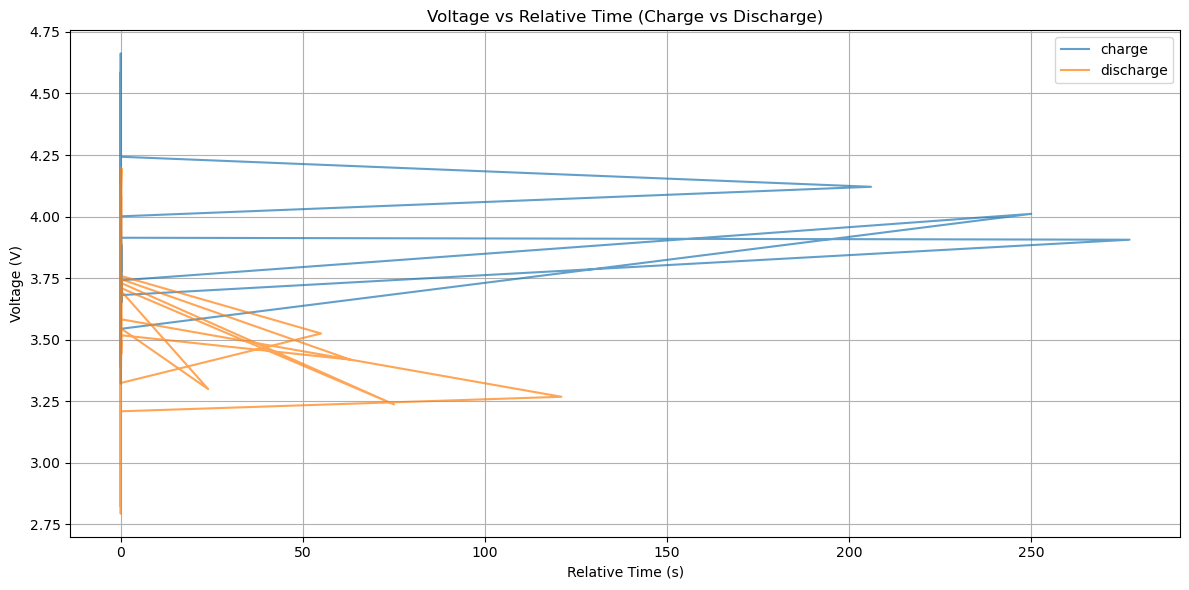

In [30]:
plt.figure(figsize=(12, 6))

for code, label in [('C', 'charge'), ('D', 'discharge')]:
    temp = filtered[filtered['type'] == code]
    plt.plot(temp['relative_time'], temp['voltage'], label=label, alpha=0.7)

plt.title('Voltage vs Relative Time (Charge vs Discharge)')
plt.xlabel('Relative Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Voltage vs Current Scatter Plot

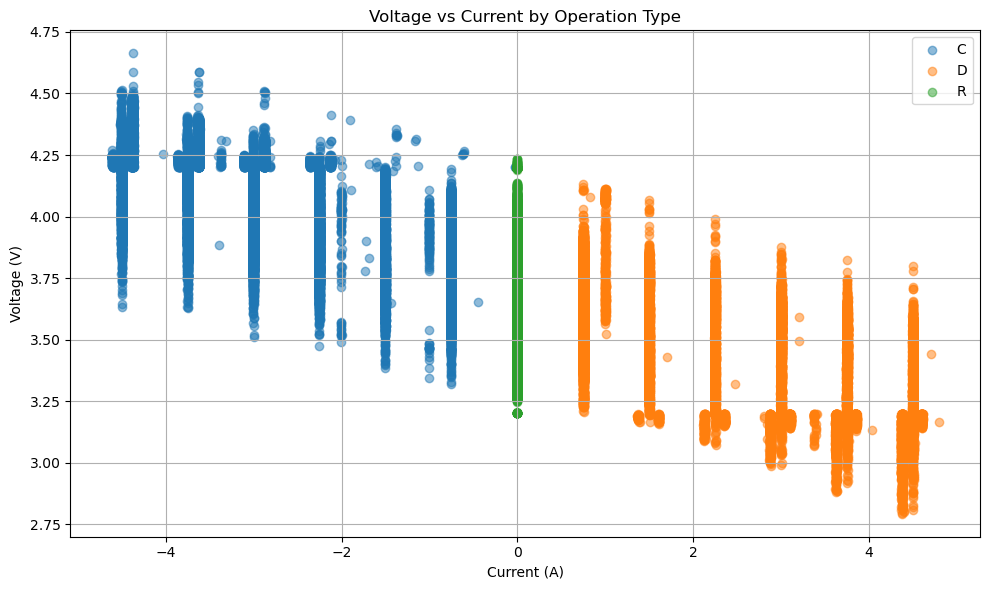

In [31]:
plt.figure(figsize=(10, 6))
colors = {'charge': 'blue', 'discharge': 'orange', 'rest': 'green'}

for op_type in df_steps['type'].unique():
    temp = df_steps[df_steps['type'] == op_type]
    plt.scatter(temp['current'], temp['voltage'], label=op_type, alpha=0.5)

plt.title('Voltage vs Current by Operation Type')
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Temperature Distribution by Operation Type

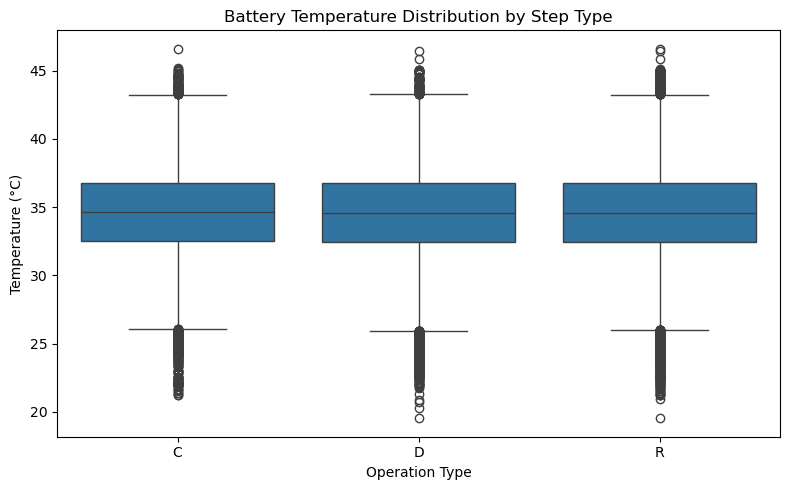

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_steps, x='type', y='temperature')
plt.title('Battery Temperature Distribution by Step Type')
plt.xlabel('Operation Type')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

Histogram of Step Durations 

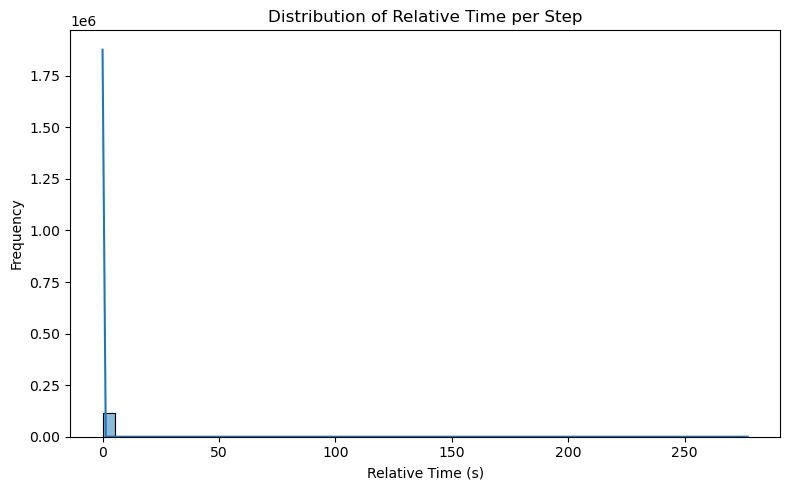

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df_steps['relative_time'], bins=50, kde=True)
plt.title('Distribution of Relative Time per Step')
plt.xlabel('Relative Time (s)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Large scale EDA

In [34]:
file_path = "/Users/tarunshyam/Learning/NASA_Battery_data/Randomized Battery Usage/DataSet/2) Interim/flatten.csv"
flatten = pd.read_csv(file_path)

In [35]:
print("Shape of the dataset:", flatten.shape)

Shape of the dataset: (1081851, 7)


In [42]:
print("Files loaded from:", flatten['source_file'].nunique(), "files")

Files loaded from: 28 files


In [39]:
# Count per subgroup
print(flatten['subgroup'].value_counts())

subgroup
Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post             409301
RW_Skewed_Low_Room_Temp_DataSet_2Post                                   191857
RW_Skewed_Low_40C_DataSet_2Post                                         163920
RW_Skewed_High_Room_Temp_DataSet_2Post                                  125542
RW_Skewed_High_40C_DataSet_2Post                                         81394
Battery_Uniform_Distribution_Variable_Charge_Room_Temp_DataSet_2Post     67432
Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post           42405
Name: count, dtype: int64


In [38]:
# Count per source file
print(flatten['source_file'].value_counts())

source_file
RW9.mat     104978
RW10.mat    103078
RW11.mat    101637
RW12.mat     99608
RW13.mat     56001
RW15.mat     47688
RW14.mat     45827
RW21.mat     42609
RW16.mat     42341
RW23.mat     41597
RW24.mat     40247
RW22.mat     39467
RW19.mat     33844
RW18.mat     31848
RW17.mat     30865
RW20.mat     28985
RW27.mat     23522
RW28.mat     21002
RW25.mat     20379
RW7.mat      17235
RW1.mat      16977
RW2.mat      16955
RW26.mat     16491
RW8.mat      16265
RW3.mat      12798
RW5.mat      11596
RW4.mat      10936
RW6.mat       7075
Name: count, dtype: int64


In [36]:
print("Columns:", flatten.columns.tolist())

Columns: ['type', 'relative_time', 'voltage', 'current', 'temperature', 'source_file', 'subgroup']


In [40]:
# Count by type (e.g., 'charge', 'discharge', 'impedance')
print(flatten['type'].value_counts())

type
R    561171
D    406574
C    114106
Name: count, dtype: int64


In [37]:
print(flatten.head())


  type                                      relative_time  \
0    C  [0.04, 60.04, 120.04, 180.04, 240.04, 300.04, ...   
1    R       [0.01, 60.01, 120.01, 180.01, 240.01, 300.0]   
2    D  [0.04, 30.04, 60.04, 90.03999999999999, 120.04...   
3    R  [0.01, 60.01, 120.01, 180.01, 240.01, 300.01, ...   
4    C  [0.04, 60.04, 120.04, 180.04, 240.04, 300.04, ...   

                                             voltage  \
0  [3.958, 4.03, 4.048, 4.056, 4.061, 4.065, 4.07...   
1         [4.199, 4.199, 4.198, 4.198, 4.198, 4.198]   
2  [4.115, 4.087, 4.071, 4.061, 4.053, 4.046, 4.0...   
3  [3.275, 3.371, 3.384, 3.39, 3.394, 3.397, 3.39...   
4  [3.633, 3.83, 3.912, 3.93, 3.936, 3.944, 3.954...   

                                             current  \
0  [-2.008, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -...   
1                                 [0, 0, 0, 0, 0, 0]   
2  [1.004, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 0.999,...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [-2.005, -2.0

In [44]:
print("\n🔎 Sample data (first 10 rows):")
print(flatten.head(10))


🔎 Sample data (first 10 rows):
  type                                      relative_time  \
0    C  [0.04, 60.04, 120.04, 180.04, 240.04, 300.04, ...   
1    R       [0.01, 60.01, 120.01, 180.01, 240.01, 300.0]   
2    D  [0.04, 30.04, 60.04, 90.03999999999999, 120.04...   
3    R  [0.01, 60.01, 120.01, 180.01, 240.01, 300.01, ...   
4    C  [0.04, 60.04, 120.04, 180.04, 240.04, 300.04, ...   
5    R       [0.01, 60.01, 120.01, 180.01, 240.01, 300.0]   
6    D  [0.04, 2.04, 4.04, 6.04, 8.04, 10.04, 12.04, 1...   
7    R  [0.01, 60.01, 120.01, 180.01, 240.01, 300.01, ...   
8    R  [0.01, 10.01, 20.01, 30.01, 40.01, 50.01, 60.0...   
9    D  [0.04, 1.04, 2.04, 3.04, 4.04, 5.04, 6.04, 7.0...   

                                             voltage  \
0  [3.958, 4.03, 4.048, 4.056, 4.061, 4.065, 4.07...   
1         [4.199, 4.199, 4.198, 4.198, 4.198, 4.198]   
2  [4.115, 4.087, 4.071, 4.061, 4.053, 4.046, 4.0...   
3  [3.275, 3.371, 3.384, 3.39, 3.394, 3.397, 3.39...   
4  [3.633, 3.83,

# ERROR 404

- Seems like only the first column (Type) is extracted properly
- All other columns are tuppled

In [75]:
file_path = "/Users/tarunshyam/Learning/NASA_Battery_data/Randomized Battery Usage/DataSet/3_Processed/flatten_fully_cleaned.csv"
lat = pd.read_csv(file_path)

In [51]:
print(lat.dtypes)

type              object
relative_time    float64
voltage          float64
current          float64
temperature      float64
source_file       object
subgroup          object
dtype: object


In [53]:
print("Files loaded from:", lat['source_file'].nunique(), "files")
print(lat['subgroup'].value_counts())
print(lat['source_file'].value_counts())
print(lat['type'].value_counts())

Files loaded from: 28 files
subgroup
Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post             34396993
Battery_Uniform_Distribution_Variable_Charge_Room_Temp_DataSet_2Post    11599924
Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post          10371782
RW_Skewed_Low_Room_Temp_DataSet_2Post                                    7143828
RW_Skewed_Low_40C_DataSet_2Post                                          5768106
RW_Skewed_High_Room_Temp_DataSet_2Post                                   5147958
RW_Skewed_High_40C_DataSet_2Post                                         3236186
Name: count, dtype: int64
source_file
RW11.mat    8656758
RW12.mat    8628477
RW10.mat    8588285
RW9.mat     8523473
RW3.mat     3005966
RW1.mat     2958752
RW7.mat     2943960
RW2.mat     2895612
RW5.mat     2857769
RW8.mat     2801600
RW4.mat     2752819
RW13.mat    2058418
RW15.mat    1790848
RW6.mat     1755228
RW14.mat    1731032
RW16.mat    1563530
RW21.mat    1494601
RW23.mat    146296

In [52]:
print(lat.describe())

       relative_time       voltage       current   temperature
count   7.766478e+07  7.766478e+07  7.766478e+07  7.766478e+07
mean    1.471351e+03  3.741075e+00  8.073460e-01 -2.353575e+02
std     9.063869e+03  2.978105e-01  1.787947e+00  1.012373e+03
min     1.000000e-02  2.715000e+00 -4.614000e+00 -4.099448e+03
25%     4.004000e+01  3.496000e+00 -1.790000e-01  2.389106e+01
50%     1.290400e+02  3.719000e+00  7.500000e-01  2.870043e+01
75%     2.710400e+02  3.997000e+00  2.000000e+00  3.454724e+01
max     1.912716e+05  4.624000e+00  5.117000e+00  5.978934e+01


In [54]:
print("Missing values:\n", lat.isnull().sum())

Missing values:
 type             0
relative_time    0
voltage          0
current          0
temperature      0
source_file      0
subgroup         0
dtype: int64


In [55]:
print("\nUnique values per column:\n", lat.nunique())


Unique values per column:
 type                 3
relative_time    93082
voltage           1616
current           5363
temperature      84908
source_file         28
subgroup             7
dtype: int64


In [56]:
agg = lat.groupby('source_file')[['voltage', 'current', 'temperature']].agg(['mean', 'std', 'min', 'max', 'count'])
print(agg.head())

              voltage                                    current            \
                 mean       std    min    max    count      mean       std   
source_file                                                                  
RW1.mat      3.763927  0.316359  3.091  4.209  2958752  1.054728  1.445224   
RW10.mat     3.754740  0.297785  2.780  4.516  8588285  0.025844  1.818962   
RW11.mat     3.752637  0.297471  2.827  4.514  8656758  0.025210  1.846938   
RW12.mat     3.745211  0.300459  2.715  4.624  8628477  0.027976  1.731580   
RW13.mat     3.693335  0.239273  3.180  4.312  2058418  1.582858  1.163595   

                                   temperature                                \
               min    max    count        mean       std       min       max   
source_file                                                                    
RW1.mat     -2.060  4.175  2958752   26.952248  4.857834  17.06738  44.65291   
RW10.mat    -4.614  4.612  8588285   32.930022  3.76388

# Data Visualisation

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

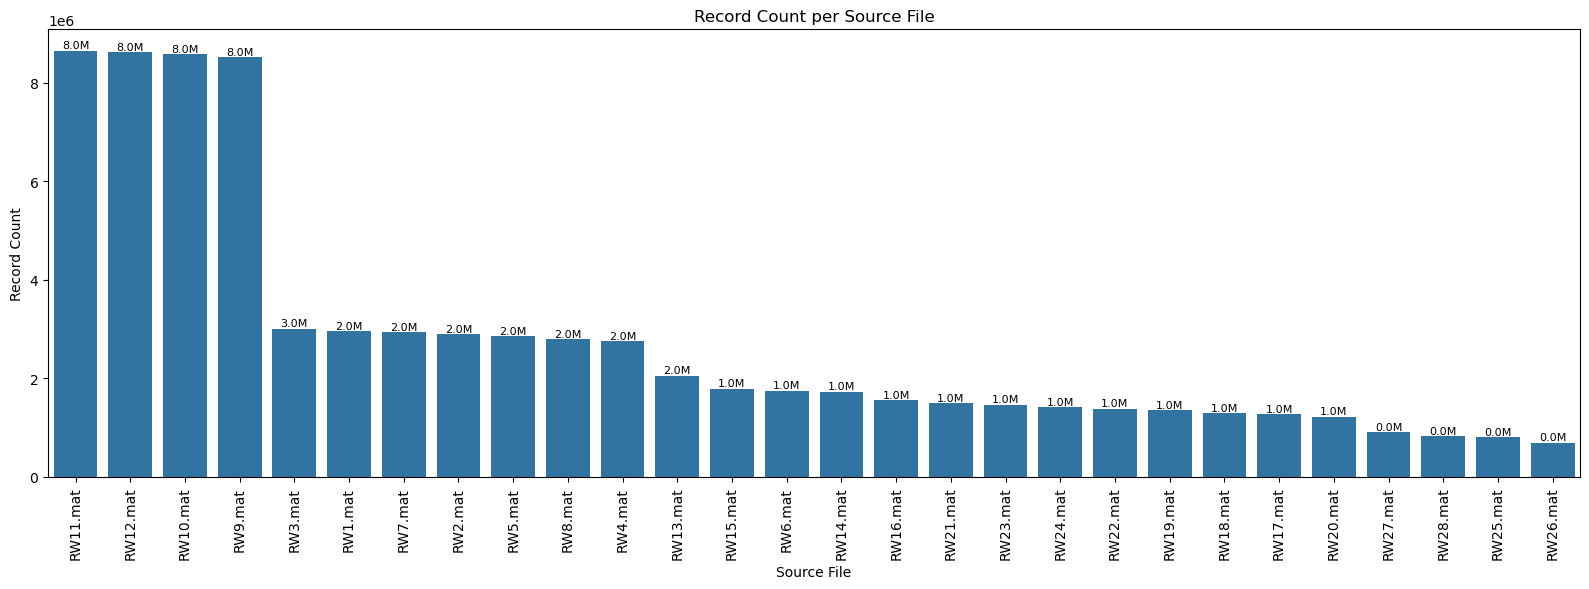

In [63]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=file_counts.index, y=file_counts.values)
plt.title("Record Count per Source File")
plt.xticks(rotation=90)
plt.xlabel("Source File")
plt.ylabel("Record Count")

# Add labels on top of bars
for index, value in enumerate(file_counts.values):
    ax.text(index, value + 50000, f'{value//1_000_000:.1f}M', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

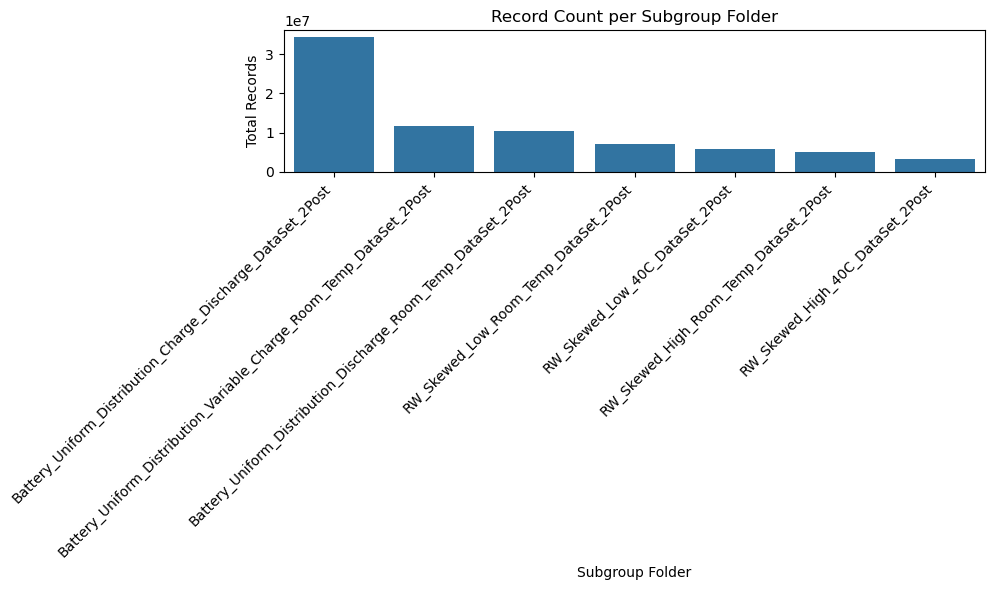

In [64]:
folder_counts = lat['subgroup'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=folder_counts.index, y=folder_counts.values)
plt.title("Record Count per Subgroup Folder")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Subgroup Folder")
plt.ylabel("Total Records")
plt.tight_layout()
plt.show()

### MEtrics

Temperature Distribution

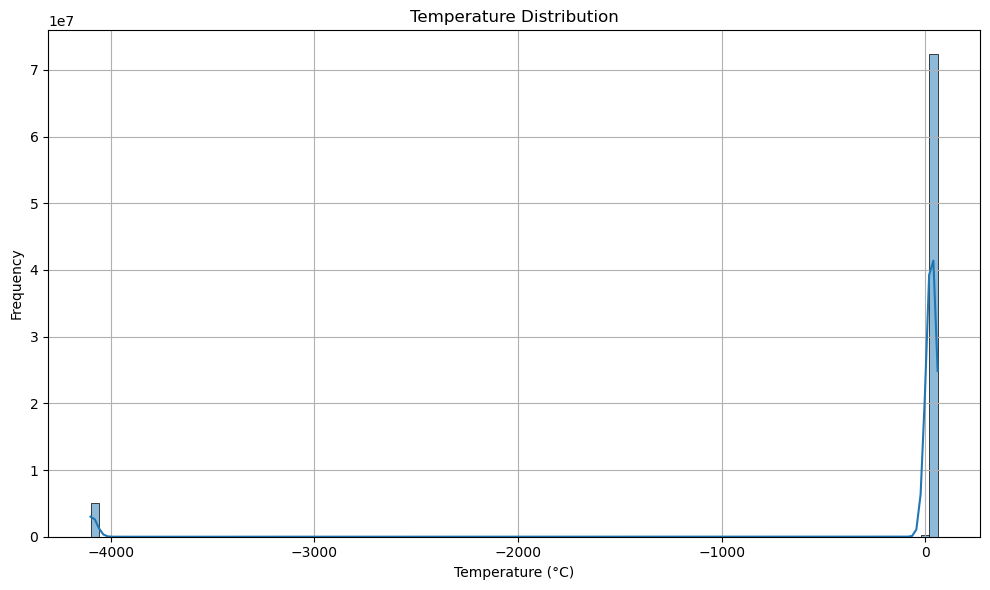

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(lat['temperature'], bins=100, kde=True)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Voltage vs Relative Time (sampled)

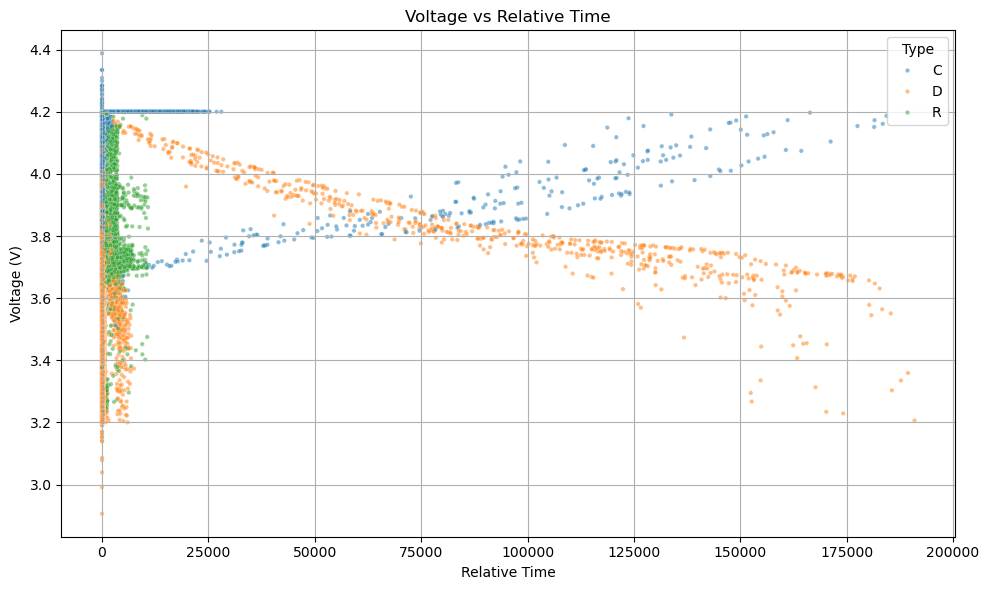

In [78]:
sample_df = lat.sample(n=100_000, random_state=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='relative_time', y='voltage', hue='type', alpha=0.5, s=10)
plt.title("Voltage vs Relative Time")
plt.xlabel("Relative Time")
plt.ylabel("Voltage (V)")
plt.legend(title='Type', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


Current vs Temperature

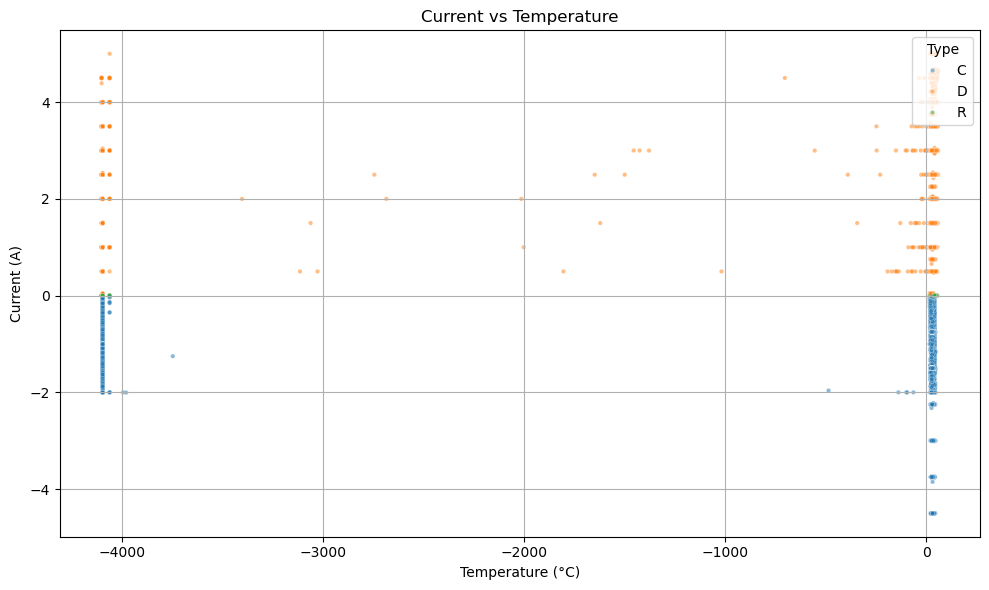

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='temperature', y='current', hue='type', alpha=0.5, s=10)
plt.title("Current vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Current (A)")
plt.legend(title='Type', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


Time-Series Trend (Voltage over Time for a Few Batteries)

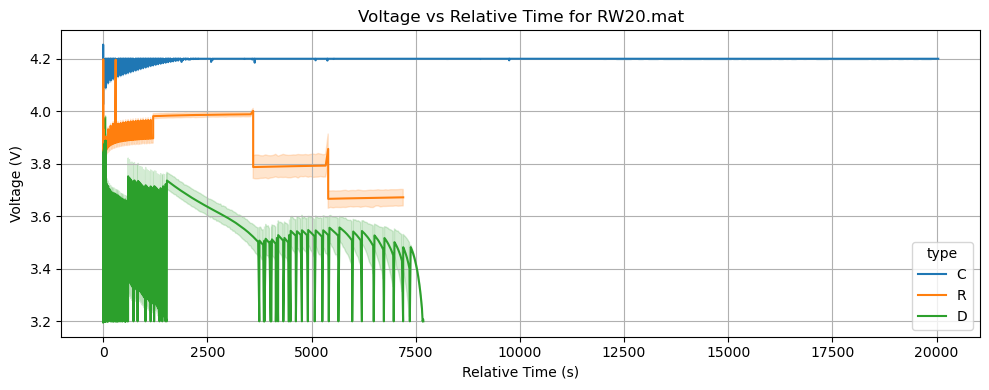

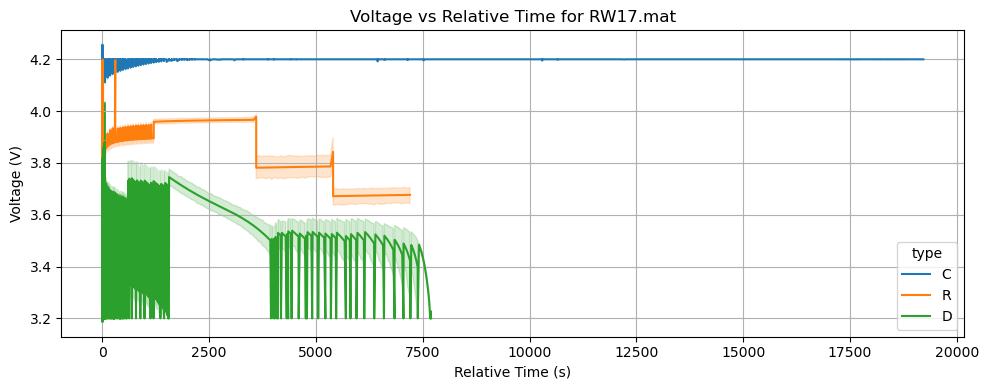

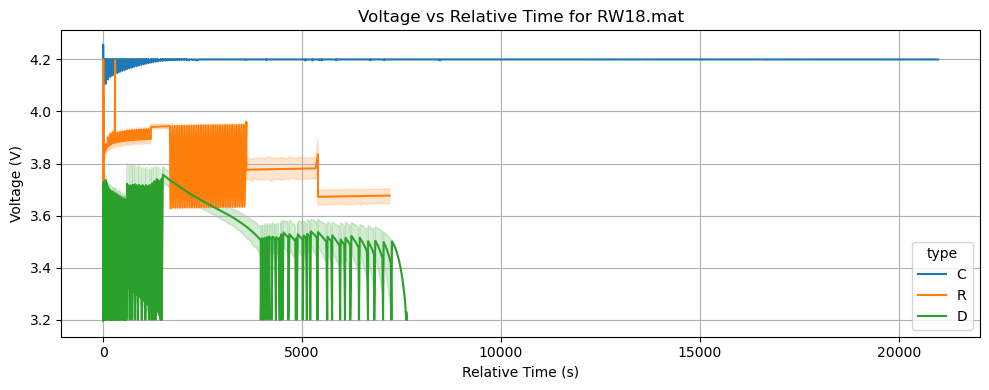

In [81]:
subset_files = lat['source_file'].unique()[:3]  # first 3 files
for file in subset_files:
    sample = lat[lat['source_file'] == file]
    plt.figure(figsize=(10, 4))
    sns.lineplot(x='relative_time', y='voltage', data=sample, hue='type')
    plt.title(f"Voltage vs Relative Time for {file}")
    plt.xlabel("Relative Time (s)")
    plt.ylabel("Voltage (V)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Voltage/Current/Temp Distribution by type

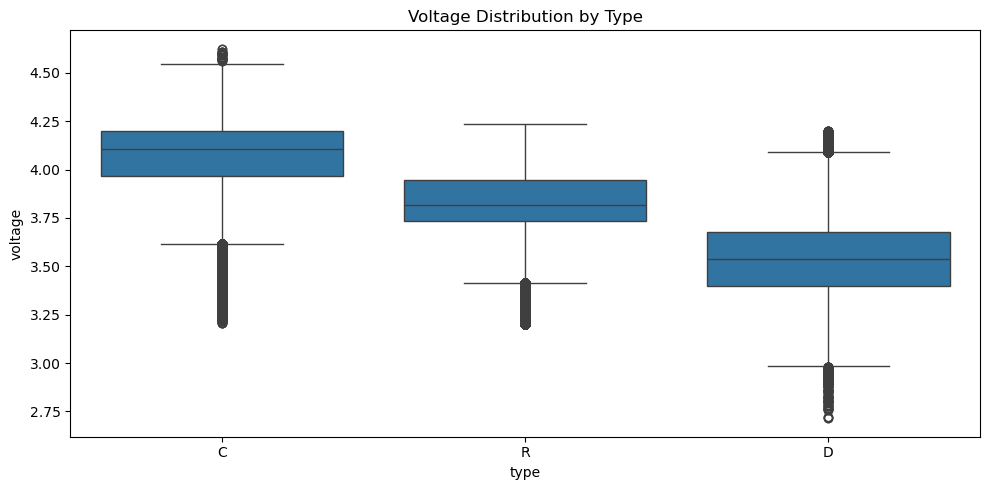

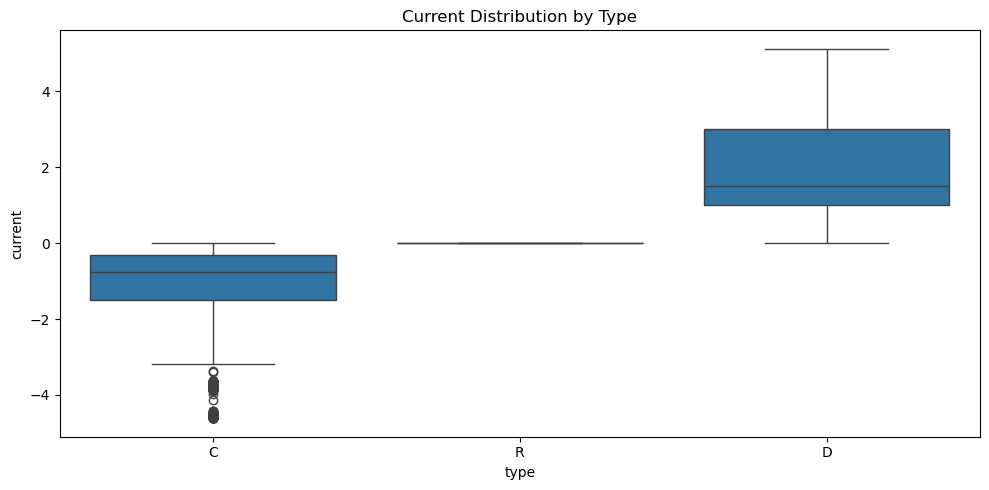

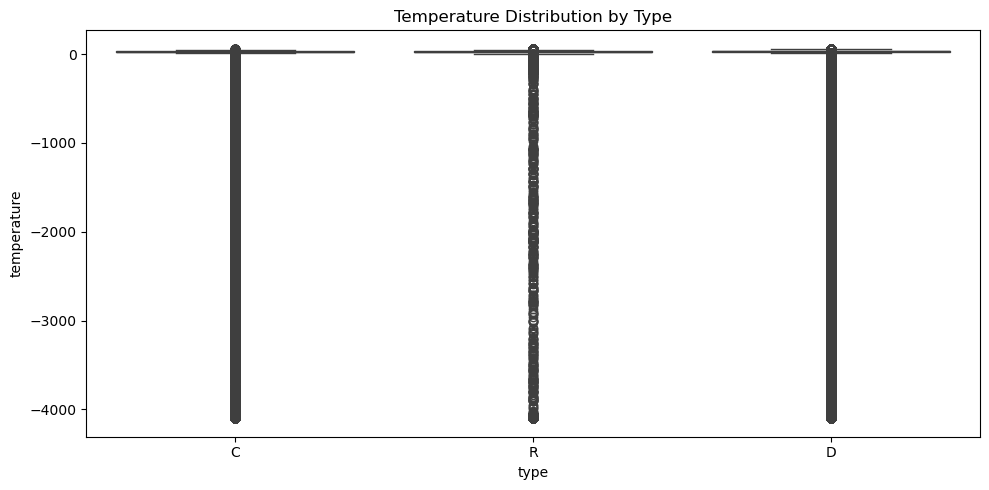

In [82]:
for col in ['voltage', 'current', 'temperature']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='type', y=col, data=lat)
    plt.title(f"{col.capitalize()} Distribution by Type")
    plt.tight_layout()
    plt.show()

Cycle Duration Distribution

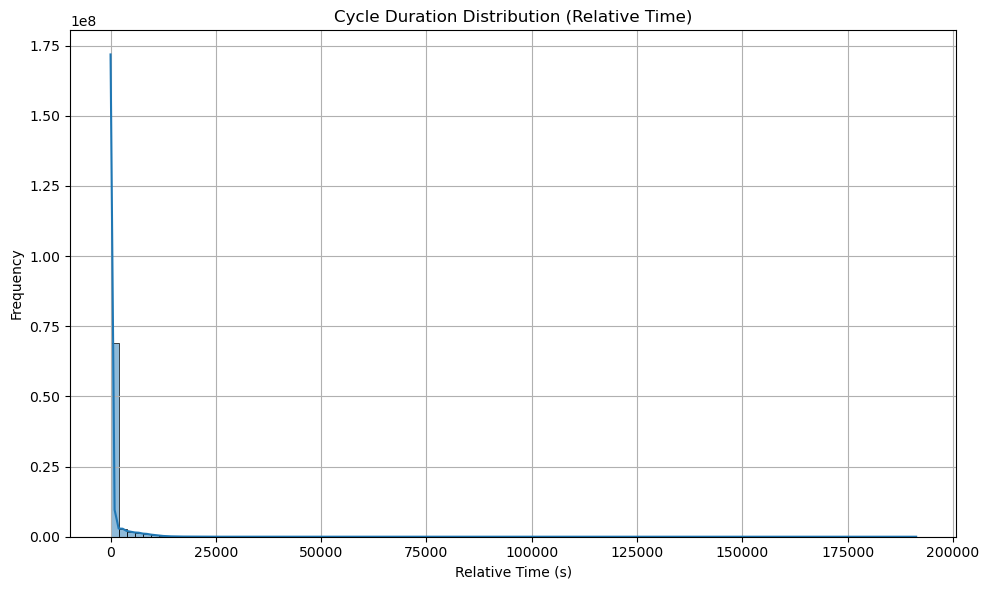

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(lat['relative_time'], bins=100, kde=True)
plt.title("Cycle Duration Distribution (Relative Time)")
plt.xlabel("Relative Time (s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

Power Calculation

In [ ]:
lat['power_watts'] = lat['voltage'] * lat['current']

plt.figure(figsize=(10, 5))
sns.histplot(lat['power_watts'], bins=100, kde=True)
plt.title("Power Distribution (Voltage × Current)")
plt.xlabel("Power (W)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
